In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#laoding the data from csv file to to pandas dataframe

car_dataset = pd.read_csv('/content/CarPrice_Dataset.csv')



In [3]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_dataset.shape

(4340, 8)

In [5]:
#Information of dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
#checking the number of missing values

car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
#checking the distribution of categorical data

print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [12]:
#Encoding the categorical data

car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG': 3, 'Electric':4}}, inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer' : 2}}, inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner': 3, 'Test Drive Car' : 4}}, inplace=True)

<ipython-input-12-aa02bfced788>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner': 3, 'Test Drive Car' : 4}}, inplace=True)


In [13]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [14]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [15]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [16]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [17]:
#Splitting the data set into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [18]:
#Training the model

#LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
training_data_prediction = lin_reg_model.predict(X_train)

In [26]:
#R-sqaured error

error_score_train = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error in training data is : ", error_score_train)

R-squared error in training data is :  0.4253132826820085


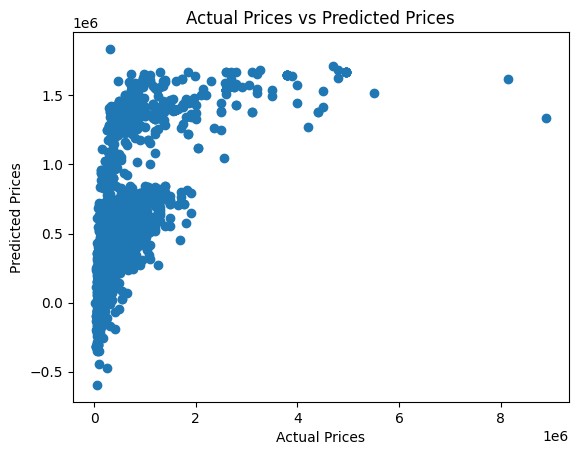

In [27]:
#Visualising actual vs predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [28]:
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
error_score_test = metrics.r2_score(Y_test, test_data_prediction)
print("R-squared error in test data is : ", error_score_test)


R-squared error in test data is :  0.4772019874558854


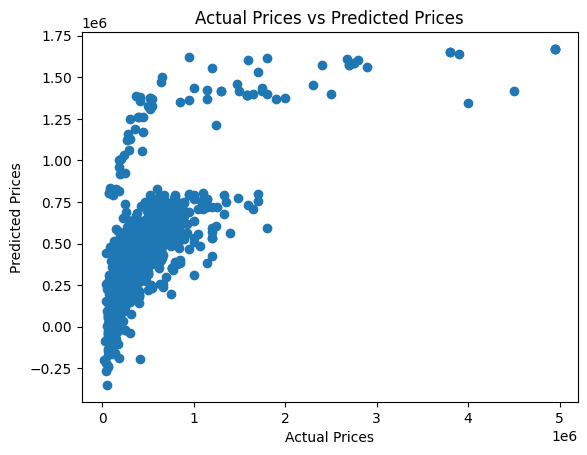

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [32]:
#Lasso Regression

lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [33]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [34]:
#R-sqaured error

error_score_train = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error in training data is : ", error_score_train)

R-squared error in training data is :  0.4253132826308632


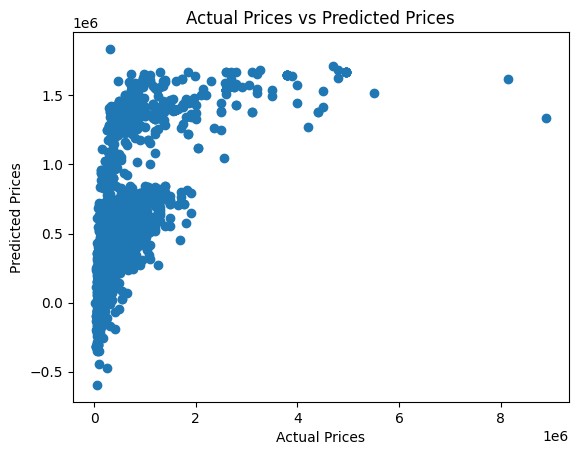

In [35]:
#Visualising actual vs predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [36]:
test_data_prediction = lasso_reg_model.predict(X_test)
error_score_train = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error in training data is : ", error_score_train)

R-squared error in training data is :  0.4253132826308632


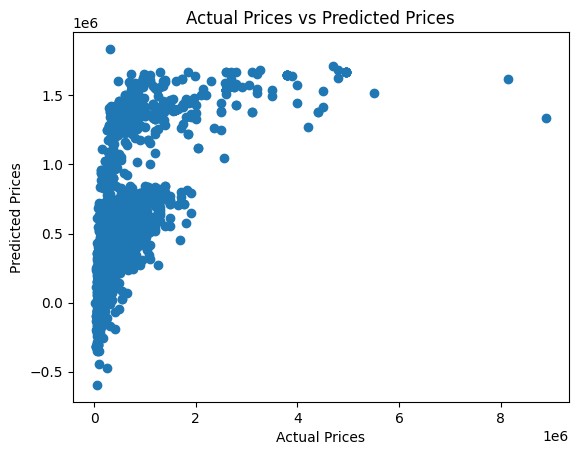

In [37]:
#Visualising actual vs predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [49]:
#Prediction of Selling Prices

input_data = (2024,12003,2,2,0,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction_linreg = lin_reg_model.predict(input_data_reshaped)
prediction_lasso = lasso_reg_model.predict(input_data_reshaped)

print("Selling Price using Linear Regression:", prediction_linreg)
print("Selling Price using Lasso Regression:", prediction_lasso)


Selling Price using Linear Regression: [1161399.32856476]
Selling Price using Lasso Regression: [1161404.7750472]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
